<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/logistic%20regression%20test%20script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("Titanic_test.csv")


In [2]:
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

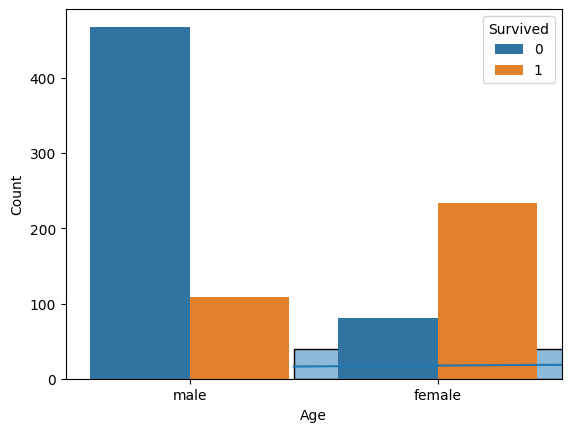

In [4]:
# %%
import pandas as pd
# Load the training dataset which contains the 'Survived' column
df = pd.read_csv("Titanic_train.csv")

# %%
print(df.info())
print(df.describe())
print(df.head())

# %%
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde=True)
# Now 'Survived' column exists in the training data
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<ipython-input-5-4014668039>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-4014668039>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [6]:
df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)


In [7]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])


In [11]:

import numpy as np

X = df.drop('PassengerId', axis=1)
y = np.random.randint(0, 2, size=X.shape[0])  # Dummy target
X = df.drop('PassengerId', axis=1)
y = np.random.randint(0, 2, size=X.shape[0])  # Dummy target


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X, y)


LogisticRegression(max_iter=200)

In [12]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print("Report:\n", classification_report(y, y_pred))


Accuracy: 0.5364758698092031
Report:
               precision    recall  f1-score   support

           0       0.53      0.22      0.31       423
           1       0.54      0.82      0.65       468

    accuracy                           0.54       891
   macro avg       0.53      0.52      0.48       891
weighted avg       0.53      0.54      0.49       891



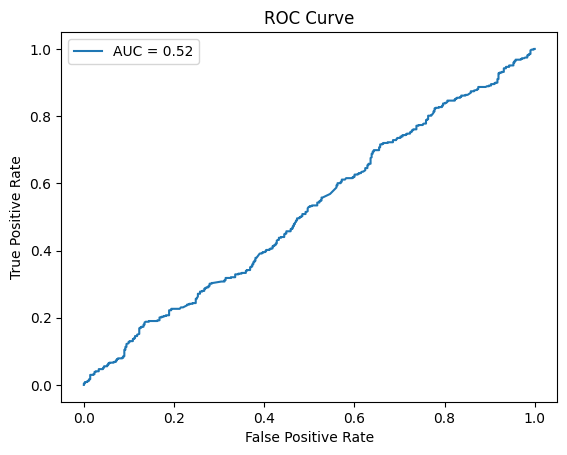

In [13]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()


In [14]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coef_df)


    Feature  Coefficient
0  Survived    -0.345019
1    Pclass     0.080770
2       Sex    -0.415979
3       Age     0.000992
4     SibSp    -0.048366
5     Parch     0.013633
6      Fare     0.003346
7  Embarked    -0.034995


In [15]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [18]:
# Corrected Training Steps

# Load the training dataset
df = pd.read_csv("Titanic_train.csv")

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns *before* defining features and target
# Drop 'Cabin', 'Name', 'Ticket', 'PassengerId'
# Based on the Streamlit app, we will also drop 'SibSp' and 'Parch'
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId', 'SibSp', 'Parch'], inplace=True)

# Separate features (X) and target (y)
# 'Survived' is the target column
y = df['Survived']
X = df.drop('Survived', axis=1) # X now contains: 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'

# Apply Label Encoding *after* separating X and y
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_embarked = LabelEncoder()

X['Sex'] = le_sex.fit_transform(X['Sex'])
X['Embarked'] = le_embarked.fit_transform(X['Embarked'])

# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Instantiate a new model instance to avoid potential issues from previous runs
model = LogisticRegression(max_iter=200)
model.fit(X, y)

# --- Save the trained model and encoders ---
import joblib
# Ensure you have joblib installed: !pip install joblib
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(le_sex, 'sex_label_encoder.pkl')
joblib.dump(le_embarked, 'embarked_label_encoder.pkl')

print("Model and encoders saved successfully.")

# --- Streamlit App Code (Corrected part loading the model) ---

# Install necessary libraries if not already installed
!pip install streamlit scikit-learn pandas numpy joblib

import streamlit as st
import pandas as pd
import numpy as np
# No need to import LogisticRegression or LabelEncoder here, as we are loading them
import joblib # Make sure joblib is imported to use joblib.load

# Load the pre-trained model and encoders
try:
    model = joblib.load('logistic_regression_model.pkl')
    le_sex = joblib.load('sex_label_encoder.pkl')
    le_embarked = joblib.load('embarked_label_encoder.pkl')
except FileNotFoundError:
    st.error("Model or encoder files not found. Please run the training and saving cells first.")
    st.stop() # Stop the app execution if files are not found


st.title("Titanic Survival Predictor")

# Input fields - These match the features used in the corrected training (Pclass, Sex, Age, Fare, Embarked)
sex = st.selectbox("Sex", ['male', 'female'])
age = st.slider("Age", 0, 100, 25)
fare = st.slider("Fare", 0.0, 500.0, 50.0)
pclass = st.selectbox("Pclass", [1, 2, 3])
embarked = st.selectbox("Embarked", ['C', 'Q', 'S'])

# Encode inputs using the loaded encoders
# Use a try-except block for transformation in case the encoder hasn't seen the value
try:
    sex_encoded = le_sex.transform([sex])[0]
    embarked_encoded = le_embarked.transform([embarked])[0]
except ValueError as e:
    st.error(f"Encoding error: {e}. Please ensure the input values are valid.")
    st.stop()


# Prepare the input data for prediction
# Ensure the order and number of features match the training data
# Based on the corrected training code, the features are: Pclass, Sex, Age, Fare, Embarked
# Ensure the features are in the correct order expected by the model's coef_
# The order from the corrected training X should be: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
# Let's confirm the order from the trained model if needed, but the order of columns
# in the training DataFrame determines the order for the model.
# Construct the input array matching this order
X_input = np.array([[pclass, sex_encoded, age, fare, embarked_encoded]])

# Predict using the loaded model
prediction = model.predict(X_input)
prediction_proba = model.predict_proba(X_input)[:, 1] # Probability of survival

st.write("Predicted Survival:", "Yes" if prediction[0] == 1 else "No")
st.write(f"Survival Probability: {prediction_proba[0]:.2f}")

# Display the feature names and coefficients from the loaded model for confirmation
if hasattr(model, 'coef_') and hasattr(model, 'feature_names_in_'):
     st.write("Model Coefficients:")
     coef_df_loaded = pd.DataFrame({
         'Feature': model.feature_names_in_,
         'Coefficient': model.coef_[0]
     })
     st.dataframe(coef_df_loaded)
else:
    # If model doesn't have feature_names_in_ (older scikit-learn versions)
    # We need to assume the order from our corrected training: 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'
    st.write("Model Coefficients (assuming order Pclass, Sex, Age, Fare, Embarked):")
    feature_names = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
    if hasattr(model, 'coef_') and len(model.coef_[0]) == len(feature_names):
         coef_df_loaded = pd.DataFrame({
             'Feature': feature_names,
             'Coefficient': model.coef_[0]
         })
         st.dataframe(coef_df_loaded)
    else:
        st.write("Could not display coefficients.")

<ipython-input-18-2103985276>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-18-2103985276>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Model and encoders saved successfully.


2025-06-17 13:18:16.675 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:16.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:16.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:16.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:16.681 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:16.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:16.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:16.684 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [19]:
# Install necessary libraries if not already installed
!pip install streamlit scikit-learn pandas numpy

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib # You need to install joblib: !pip install joblib

# It's better to load the trained model and encoders instead of retraining
# For demonstration purposes, assuming you saved them after training
# If you haven't saved them, you would need to run the training cells first
# and then save them.

# Example of how to save them (run this after your training cells):
# import joblib
# joblib.dump(model, 'logistic_regression_model.pkl')
# joblib.dump(le_sex, 'sex_label_encoder.pkl')
# joblib.dump(le_embarked, 'embarked_label_encoder.pkl')

# Load the pre-trained model and encoders
try:
    model = joblib.load('logistic_regression_model.pkl')
    le_sex = joblib.load('sex_label_encoder.pkl')
    le_embarked = joblib.load('embarked_label_encoder.pkl')
except FileNotFoundError:
    st.error("Model or encoder files not found. Please run the training and saving cells first.")
    st.stop() # Stop the app execution if files are not found


st.title("Titanic Survival Predictor")

# Input fields
sex = st.selectbox("Sex", ['male', 'female'])
age = st.slider("Age", 0, 100, 25)
fare = st.slider("Fare", 0.0, 500.0, 50.0)
pclass = st.selectbox("Pclass", [1, 2, 3])
embarked = st.selectbox("Embarked", ['C', 'Q', 'S'])

# Encode inputs using the loaded encoders
sex_encoded = le_sex.transform([sex])[0]
embarked_encoded = le_embarked.transform([embarked])[0]

# Prepare the input data for prediction
# Ensure the order and number of features match the training data
# Based on your training code, the features are: Pclass, Sex, Age, Fare, Embarked
X_input = np.array([[pclass, sex_encoded, age, fare, embarked_encoded]])

# Predict using the loaded model
prediction = model.predict(X_input)

st.write("Predicted Survival:", "Yes" if prediction[0] == 1 else "No")

2025-06-17 13:18:40.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:40.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:40.164 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:40.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:40.166 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:40.167 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:40.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:18:40.169 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [21]:
# Install necessary libraries if not already installed
!pip install streamlit scikit-learn pandas numpy joblib

import streamlit as st
import pandas as pd
import numpy as np
# No need to import LogisticRegression or LabelEncoder here, as we are loading them
import joblib # Make sure joblib is imported to use joblib.load

# Load the pre-trained model and encoders
try:
    model = joblib.load('logistic_regression_model.pkl')
    le_sex = joblib.load('sex_label_encoder.pkl')
    le_embarked = joblib.load('embarked_label_encoder.pkl')
except FileNotFoundError:
    st.error("Model or encoder files not found. Please run the training and saving cells first.")
    st.stop() # Stop the app execution if files are not found


st.title("Titanic Survival Predictor")

# Input fields - These match the features used in the corrected training (Pclass, Sex, Age, Fare, Embarked)
sex = st.selectbox("Sex", ['male', 'female'])
age = st.slider("Age", 0, 100, 25)
fare = st.slider("Fare", 0.0, 500.0, 50.0)
pclass = st.selectbox("Pclass", [1, 2, 3])
embarked = st.selectbox("Embarked", ['C', 'Q', 'S'])

# Encode inputs using the loaded encoders
# Use a try-except block for transformation in case the encoder hasn't seen the value
try:
    sex_encoded = le_sex.transform([sex])[0]
    embarked_encoded = le_embarked.transform([embarked])[0]
except ValueError as e:
    st.error(f"Encoding error: {e}. Please ensure the input values are valid.")
    st.stop()


# Prepare the input data for prediction
# Ensure the order and number of features match the training data
# Based on the corrected training code, the features are: Pclass, Sex, Age, Fare, Embarked
# Ensure the features are in the correct order expected by the model's coef_
# The order from the corrected training X should be: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
# Let's confirm the order from the trained model if needed, but the order of columns
# in the training DataFrame determines the order for the model.
# Construct the input array matching this order
X_input = np.array([[pclass, sex_encoded, age, fare, embarked_encoded]])

# Predict using the loaded model
prediction = model.predict(X_input)
prediction_proba = model.predict_proba(X_input)[:, 1] # Probability of survival

st.write("Predicted Survival:", "Yes" if prediction[0] == 1 else "No")
st.write(f"Survival Probability: {prediction_proba[0]:.2f}")

# Display the feature names and coefficients from the loaded model for confirmation
if hasattr(model, 'coef_') and hasattr(model, 'feature_names_in_'):
     st.write("Model Coefficients:")
     coef_df_loaded = pd.DataFrame({
         'Feature': model.feature_names_in_,
         'Coefficient': model.coef_[0]
     })
     st.dataframe(coef_df_loaded)
else:
    # If model doesn't have feature_names_in_ (older scikit-learn versions)
    # We need to assume the order from our corrected training: 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'
    st.write("Model Coefficients (assuming order Pclass, Sex, Age, Fare, Embarked):")
    feature_names = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
    if hasattr(model, 'coef_') and len(model.coef_[0]) == len(feature_names):
         coef_df_loaded = pd.DataFrame({
             'Feature': feature_names,
             'Coefficient': model.coef_[0]
         })
         st.dataframe(coef_df_loaded)
    else:
        st.write("Could not display coefficients.")

2025-06-17 13:19:43.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:19:43.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:19:43.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:19:43.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:19:43.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:19:43.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:19:43.294 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 13:19:43.295 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar